<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Solucion_Interrogacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interrogación ICH3424 - Semestre II-2020

## Preguntas con Alternativas

In [27]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image

#Constantes
g   = 9.81 #(m/s2)
rho = 1000 #(kg/m3)

#Solucion ecuación de dispersion
def disper(T,h,delta_c=0.0001,tol=1e-6):
  #constante
  g = 9.81 #m/s2
  f = 1/T
  C = np.sqrt(g*h)
  for i in range(15):
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [28]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png
Saving Picture2.png to Picture2.png
Saving Picture3.png to Picture3.png
Saving Picture4.png to Picture4.png
Saving Picture5.png to Picture5.png
Saving Picture6.png to Picture6.png


---
1) ¿Qué representa la ecuación de Laplace en la teoría de ondas lineales?

* A. La condición de borde dinámica
* **B. El balance de masa**
* C. El balance de momentum
* D. La condición de borde cinemática

En la teoría lineal de ondas, la ecuación de Laplace representa la conservación de la masa (del agua) bajo la condición de densidad constante (equivalente a la ecuación de continuidad) en combinación con el movimiento sin rotación (flujo irrotacional). La velocidad en la ecuación de balance de masa original (o ecuación de continuidad) ha sido reemplazada por las derivadas espaciales de la función de potencial de velocidad, creando la ecuación de Laplace.

---
2) Olas con incidencia normal a la línea de costa de período 8 s y altura de ola 1 m a una profundidad d = 70 m. ¿Cuál de estas figuras muestra la evolución correcta de la altura de las olas en función de la profundidad cuando se ignoran todas las fuentes de disipación?

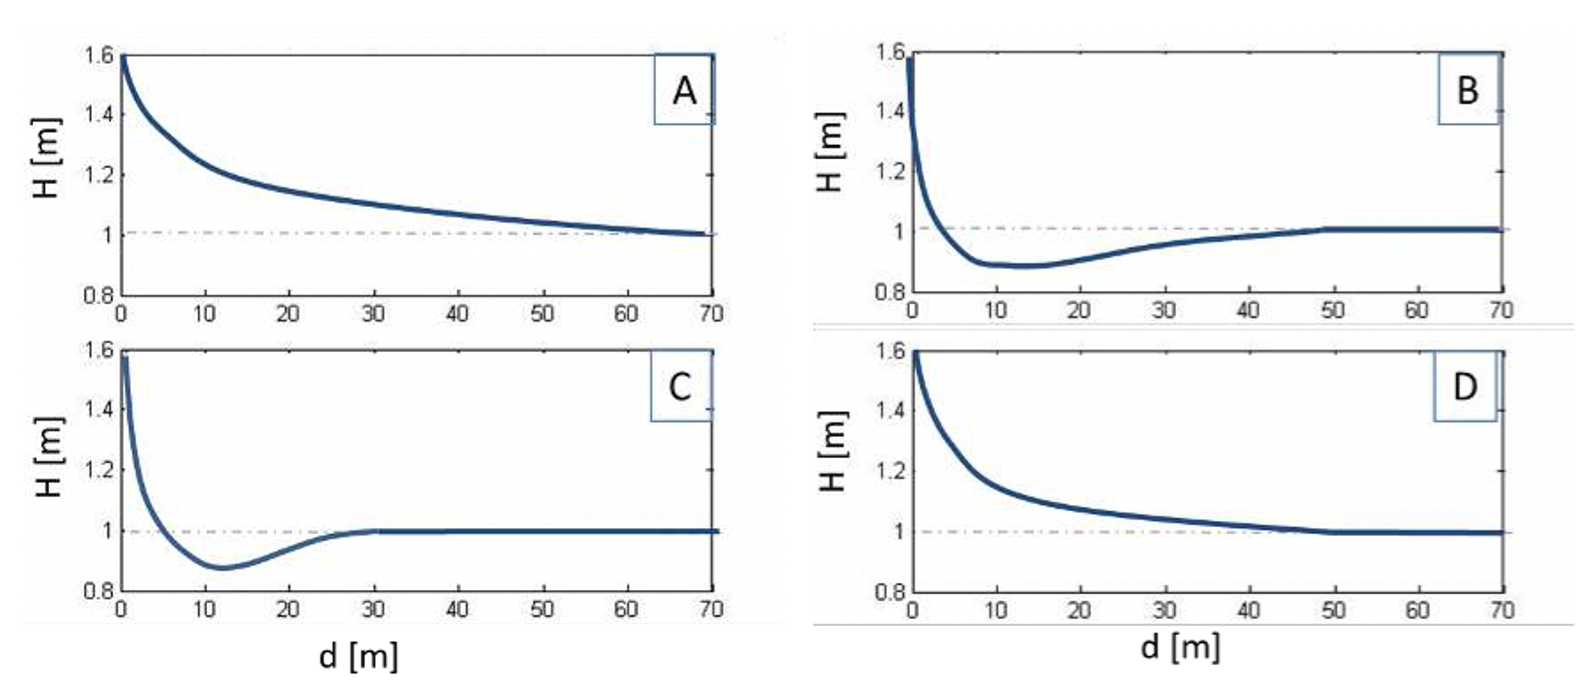

In [32]:
Image('Picture1.png', width = 850)

Aplicamos conservación del flujo de Energía:

\begin{align}
\mathscr{F}_{0} &= \mathscr{F}_{h} \\
E_{0}C_{g_{0}} &= E_{h}C_{g_{h}} \\
\frac{1}{8}\rho g H_{0}^{2}C_{g_{0}} &= \frac{1}{8}\rho g H_{h}^{2}C_{g_{h}} \\
H_{0}^{2}C_{g_{0}} &= H_{h}^{2}C_{g_{h}}
\end{align}

Podemos resolver para $H_{h}=H(h)$:

$$H(h) = H_{0} \sqrt{\frac{C_{g_{0}}}{C_{g}(h)}}$$

Con:

$$C_{g}(h) = C(h)\cdot n = C(h)\cdot \frac{1}{2}\left(1+\frac{2kh}{\sinh(2kh)} \right) \quad\quad C_{g_{0}} = \frac{C_{0}}{2} = \frac{1}{2}\left(\frac{gT}{2\pi}\right) $$

La profundidad relativa es: 0.7


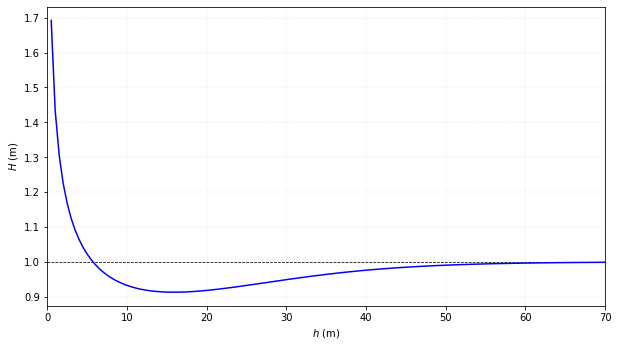

In [ ]:
#Datos
T = 8  #(s)
H = 1  #(m)
h = 70 #(m)

w = 2*np.pi/T

C = disper(T,h)
L = C*T

print('La profundidad relativa es:',np.round(h/L,2))

Cg0 = C/2#((g*T)/(2*np.pi))/2

dh = -0.5
h_vec = np.arange(h,0,dh) #(0.025*h)+dh

C1 = np.array([disper(T,h_vec[i]) for i in range(len(h_vec))])
k1  = w/C1
n   = (1/2)*(1 + ( (2*k1*h_vec)/np.sinh(2*k1*h_vec) ))
Cg1 = n*C1
H_h = H*np.sqrt(Cg0/Cg1)


alto  = 5.5
ancho = 10
fig = plt.figure(figsize=(ancho, alto))


plt.axhline(y=H,linewidth=0.75, linestyle='--', color='k')
plt.plot(h_vec,H_h,'b')
plt.xlabel('$h$ (m)')
plt.ylabel('$H$ (m)')
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.xlim(0,h)
plt.show()

---
3) En aguas someras, la magnitud de la componente vertical de la velocidad orbital:

* A. Disminuye exponencialmente con profundidad
* **B. Disminuye linealmente con la profundidad**
* C. Permanece constante con profundidad
* D. Aumenta linealmente con la profundidad

La velocidad orbital para la componente vertical ($z$) es:

$$u_{z}=\omega a \frac{\sinh [k(h+z)]}{\sinh (k h)} \cos (\omega t-k x)$$

también puede ser expresado como:

$$u_{z}=\hat{u}_{z} \cos (\omega t-k x) \quad \text{con} \quad \hat{u}_{z}=\omega a \frac{\sinh [k(h+z)]}{\sinh (k h)}$$

En aguas someras, i.e., cuando $kh\longrightarrow 0$, tenemos que:

\begin{align}
\frac{\sinh [k(h+z)]}{\sinh (k h)} &= \frac{ \overbrace{\sinh(kh)}^{kh}\overbrace{\cosh(kz)}^{1}+ \overbrace{\cosh(kh)}^{1}\overbrace{\sinh(kz)}^{kz}   }{\underbrace{\sinh(kh)}_{kh}}  \\
 &= \frac{ kh\cosh(kz)+ 1\cdot\sinh(kz)   }{kh}   \\
 &= 1 + \frac{kz}{kh} \\
\end{align}

De manera que la amplitud de la velocidad vertical orbital queda determinada como:

$$\hat{u}_{z}=\omega a \left(1 + \frac{z}{h}\right)$$

Esta expresión muestra que, para aguas someras, la amplitud de la velocidad vertical varía linealmente a lo largo de la vertical.

---
4) Consideramos un oleaje de 2 m de altura que viaja en aguas profundas con un periodo de 15 s. ¿Cuál es la máxima velocidad orbital horizontal experimentada por un buzo a 20 m de la superficie?

* **A. 0.29 m/s**
* B. 0.60 m/s 
* C. 0.95 m/s 
* D. 1.20 m/s


La velocidad orbital para la componente horizontal ($x$) es:

$$u_{x}=\omega a \frac{\cosh [k(h+z)]}{\sinh (k h)} \sin (\omega t-k x)$$

también puede ser expresado como:

$$u_{x}=\hat{u}_{x} \sin (\omega t-k x) \quad \text{con} \quad \hat{u}_{x}=\omega a \frac{\cosh [k(h+z)]}{\sinh (k h)}$$

En aguas profundas, i.e., cuando $kh\longrightarrow \infty$, tenemos que:

\begin{align}
\frac{\cosh[k(h+z)]}{\sinh(kh)} &= \frac{\cosh(kz)\cosh(kh)+ \sinh(kz)\sinh(kh)}{\sinh(kh)}  \\
 &= \cosh(kz)\cdot\underbrace{\tanh(kh)}_{1} + \sinh(kz) \\
 &= \underbrace{\cosh(kz) + \sinh(kz)}_{e^{kz}} \\
\end{align}


De manera que la amplitud de la velocidad vertical orbital queda determinada como:

$$\hat{u}_{x}=\omega a e^{kz}$$

In [ ]:
#Datos
H = 2   #(m)
T = 15  #(s)
z = -20 #(m)

w = 2*np.pi/T
k = w**2/g
a = H/2

u_x = w*a*np.exp(k*z)

print('La máxima velocidad horizontal orbital es:',np.round(u_x,2),'m/s')

La máxima velocidad horizontal orbital es: 0.29 m/s


5) Una onda de tsunami se propaga en las profundidades del océano (h = 5 km) con una longitud de onda característica de 200 km. ¿Cuál es su velocidad de propagación?

* **A. 221 m/s** 
* B. 279 m/s 
* C. 420 m/s 
* D. 110 m/s


La longitud de onda de un tsunami es del orden de cientos de kilometros (200 km). Como la profundidad del océano (5000 m) es mucho menor que la longitud de esta onda, podemos considerar que un tsunami es una onda que se propaga en aguas someras. En aguas poco profundas, la velocidad de fase es igual a:

$$C = \sqrt{gh}$$

Donde:

* $h$: profundad
* $g$: aceleración de gravedad.


In [ ]:
#Datos
h = 5000 #(m) 

#Un tsunami se propaga como una onda larga. Su velocidad está dada por:
C = np.sqrt(g*h) #(m/s)

print('La velocidad de propagación es:',np.round(C,2),'m/s')

La velocidad de propagación es: 221.47 m/s


---
6) La siguiente figura muestra una serie de tiempo de la presión total registrada por un sensor de presión desplegado un metro por encima del lecho marino. La señal de presión tiene un periodo de 6 s, una amplitud de 4905 N/m2 y oscila alrededor de un valor medio de 93200 N/m2.

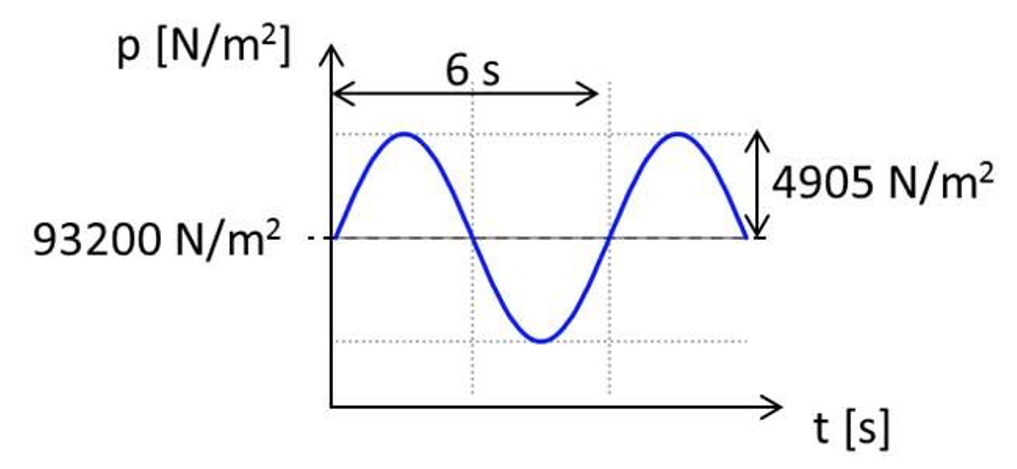

In [43]:
Image('Picture2.png', width = 500)

a) ¿Cuál es la profundidad media del agua en la ubicación del sensor?

* A. 8.5m
* B. 9.5m
* **C. 10.5m**
* D. 12.5m 

La expresión de la presión total derivada de la teoría lineal es:

$$P = -\rho g z + \rho g \eta K_{p}(z)$$

Con:

$$\eta = \frac{H}{2}\cos(kx- \omega t)$$

$$K_{p}(z) = \frac{\cosh(k[h+z])}{\cosh(kh)}$$

Si sumamos y restamos la amplitud a la presión media, obtendremos los valores de presión máxima y mínima:

$$P_{max} = P_{media} + P_{a}$$
$$P_{max} = P_{media} - P_{a}$$

Lo unico que hace variar las mediciones de presión para un mismo punto es el paso de las ondas (superficie libre). De manera que los valores máximos y mínimos de presión vienen dados en función del máximo y mínimo de la superficie libre, así:

$$P_{max} = -\rho g (-h+1) + \rho g \frac{H}{2} K_{p}(z)$$
$$P_{min} = -\rho g (-h+1) - \rho g \frac{H}{2} K_{p}(z)$$

con:

$$K_{p}(-h+1) = \frac{\cosh(k)}{\cosh(kh)}$$

Si sumamos las expresiones anteriores:

$$P_{max}+P_{min} = -2\rho g(-h+1)$$

Despejando para $h$:

$$h = \frac{P_{max}+P_{min}}{2\rho g} +1$$



In [ ]:
#Datos
T       = 6     #(s)
P_a     = 4905  #(N/m2)
P_media = 93200 #(N/m2)
delta_z = 1     #(m)   

#Presion Máxima y Mínima
P_max = P_media + P_a
P_min = P_media - P_a

h = ((P_max+P_min)/(2*rho*g)) + 1

print('La velocidad de propagación es:',np.round(h,2),'m')

La velocidad de propagación es: 10.5 m


b) ¿Cuál es la altura de ola medida por este sensor de presión? (elige la respuesta más cercana)

* A. 0.5m
* B. 1m
* **C. 1.9m**
* D. 2.6m

Para obtener la altura basta con restar las siguientes expresiones:

$$P_{max} = -\rho g (-h+1) + \rho g \frac{H}{2} K_{p}(z)$$
$$P_{min} = -\rho g (-h+1) - \rho g \frac{H}{2} K_{p}(z)$$

Así:

$$P_{max}-P_{min} = 2\rho g\frac{H}{2} \frac{\cosh(k)}{\cosh(kh)}$$

Despejando para $H$:

$$H = \left(\frac{P_{max}-P_{min}}{\rho g}\right) \frac{\cosh(kh)}{\cosh(k)} $$

In [ ]:
C = disper(T,h)
w = 2*np.pi/T
k = w/C

H = ((P_max-P_min)/(rho*g))*(np.cosh(k*h)/np.cosh(k))

print('La altura de ola es:',np.round(H,2),'m')

La altura de ola es: 2.03 m


---
## Preguntas de Desarrollo Conceptual

---
[Capítulo 1 (Masselink and Hughes)]:

1) En el puerto de San Antonio se ha proyectado la construcción de un Puerto de Gran Escala (PGE) que ampliará la capacidad del puerto actual. Explique las propiedades de un sistema costero, como el que se encuentra en este puerto, y de qué manera estas podrían verse afectadas por la construcción de este proyecto.


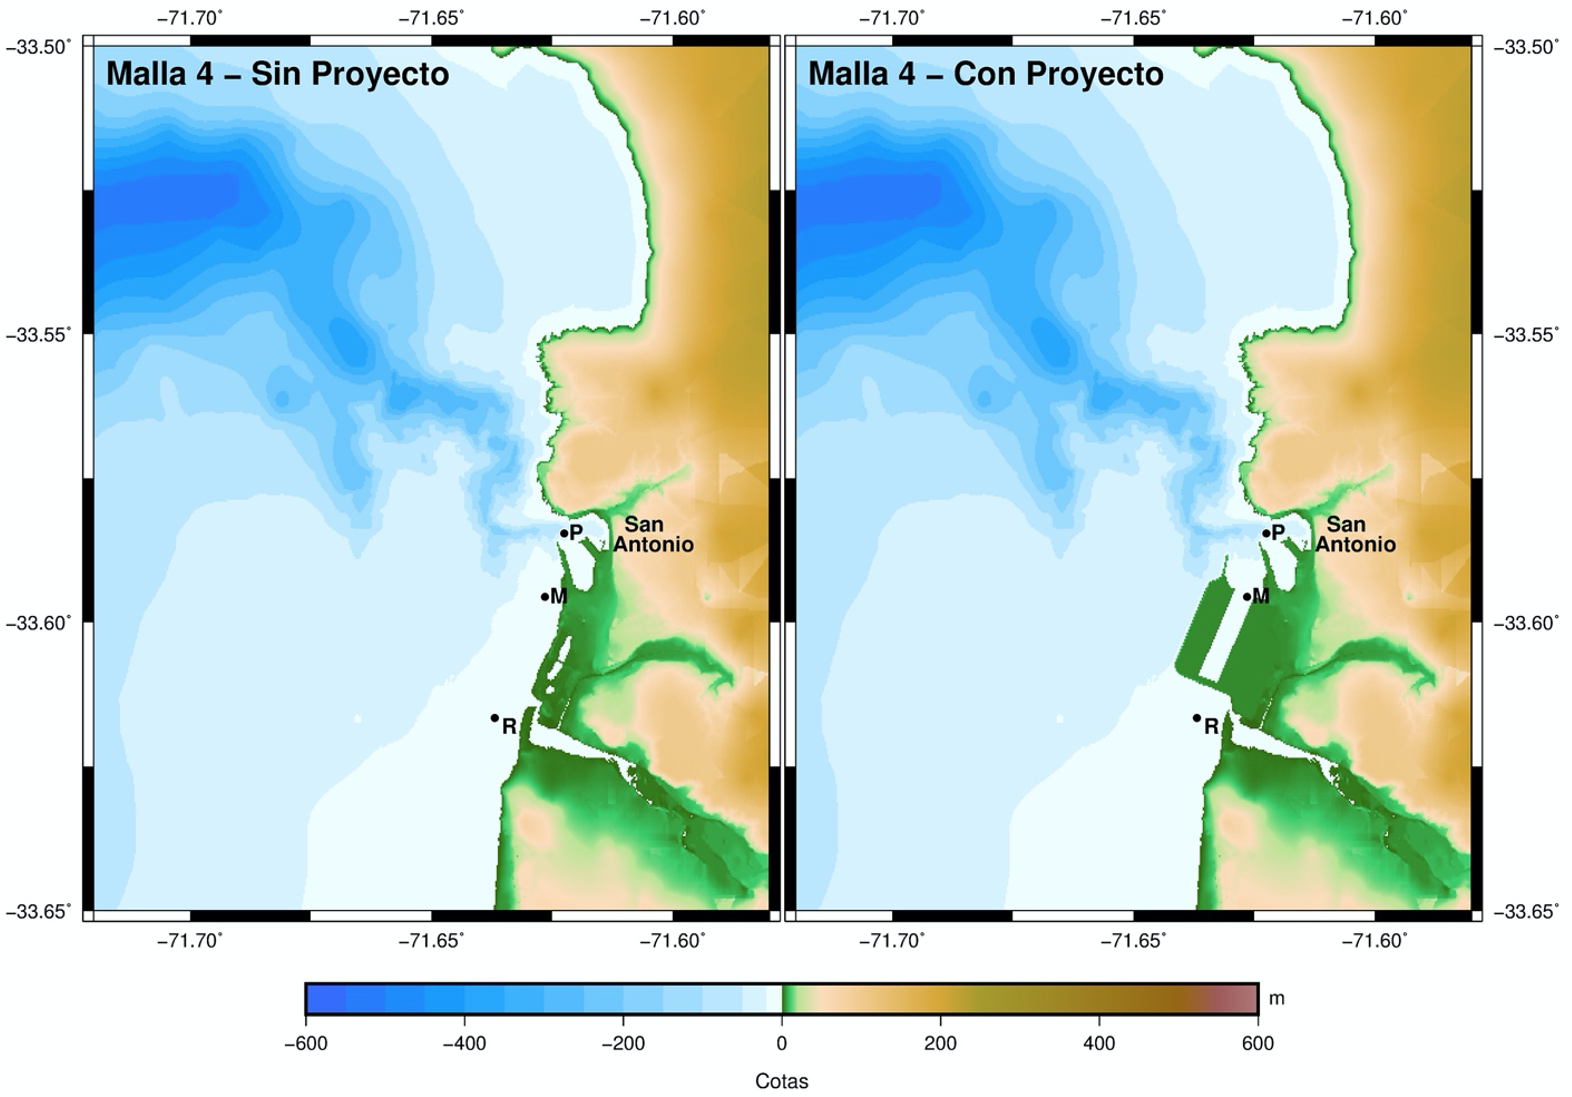

In [42]:
Image('Picture3.png', width = 750)

El sistema costero en sí tiene cuatro propiedades principales que corresponden al flujo de energía y material a través del sistema: 1) los **procesos** que representan la energía y el material en tránsito de una parte del sistema a otra. 2) la interacción entre un fluido en movimiento y el lecho resultando en arrastre y **transporte de sedimentos**. 3) la forma tridimensional de un relieve (**morfología**). 4) la historia estratificada de sedimentos dentro del relieve (**Estratigrafía**). 

La propiedad más importante que podría verse afectada por la cosntrucción del PGE es el **Transporte de sedimentos**. Una nueva configuración podría cambiar totalmente el panorama de la distribución de depositación y erosión de la costa.  

---
[Capítulo 3 (Masselink and Hughes)]:

2) La siguiente figura presenta un registro de mareas en Valparaíso:


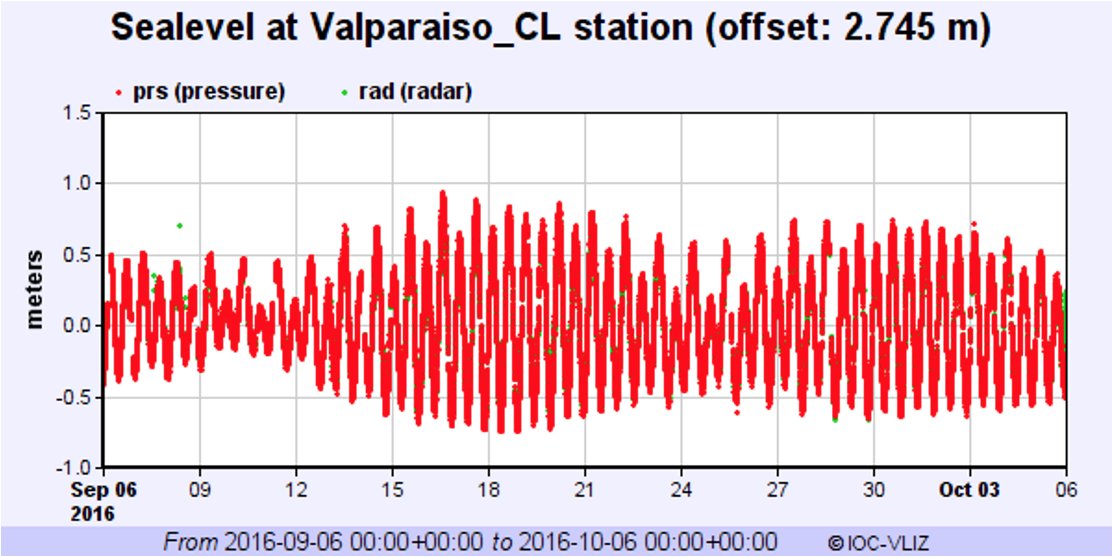

In [40]:
Image('Picture4.png', width = 500)

* a)	Explique brevemente la evolución temporal del registro de mareas, tanto a escala semanal cómo diaria. Qué factores explican este comportamiento?. Puede utilizar dibujos o esquemas.
* b)	Si una bahía tiene una profundidad media de 80 m y una longitud de 500 km, calcule el primer modo de frecuencia de oscilación natural e indique si se debiera esperar amplificación de mareas en ella.


a) La modulación de las amplitudes a lo largo del registro se explica mediante el ciclo lunar con una envolvente de amplitud con 2 máximos (luna llena y luna nueva, sisigias) y 2 mínimos (Cuadraturas).

La asimetría a escala diaria está compuesta de 2 mareas altas y 2 mareas bajas de distinta magnitud. Esto se explica por la declinación relativa de la luna respecto al Ecuador. Los pleamares ocurren dos veces en un ciclo de rotación terrestre (~ 24 horas) debido a las fuerzas de atracción gravitacional y centrípetas.

Ambos fenómenos se deben fundamentalmente a la interacción de fuerzas de atracción de la luna y el sol y sus movimientos relativos.


b) Para que una bahía pueda resonar producto de las mareas, se necesita que el periodo de oscilación de las mareas sea proporcional al periodo natural de la bahía. La fórmula de Merian brinda un primera aproximación para el periodo resonante de la bahía:

$$T=\frac{2 L_{b}}{\sqrt{gh}}$$

Tomando: $L_{b}$ = 500 km y $h$ = 80 m, tenemos:

$$T \approx 10 \;\text{Horas}$$

Lo que corresponde a un periodo de orden similar al periodo de mareas semi-diurnas. Esto podría provocar amplificación de las ondas de mareas al interior de la bahía.

---
[Capítulo 5 (L.H. Holthuijsen.)]:

Esta pregunta se basa en datos de campo obtenidos durante el Joint North Sea Wave Project (JONSWAP, Hasselmann et al., 1993). Se registraron series de tiempo de elevación de la superficie del mar en varios lugares a lo largo de un transecto costero (todo en aguas profundas). La Figura muestra los espectros de densidad de varianza calculados a partir de los registros de olas a diferentes distancias de la costa. Cuando se realizaron estas mediciones, el viento era offshore.


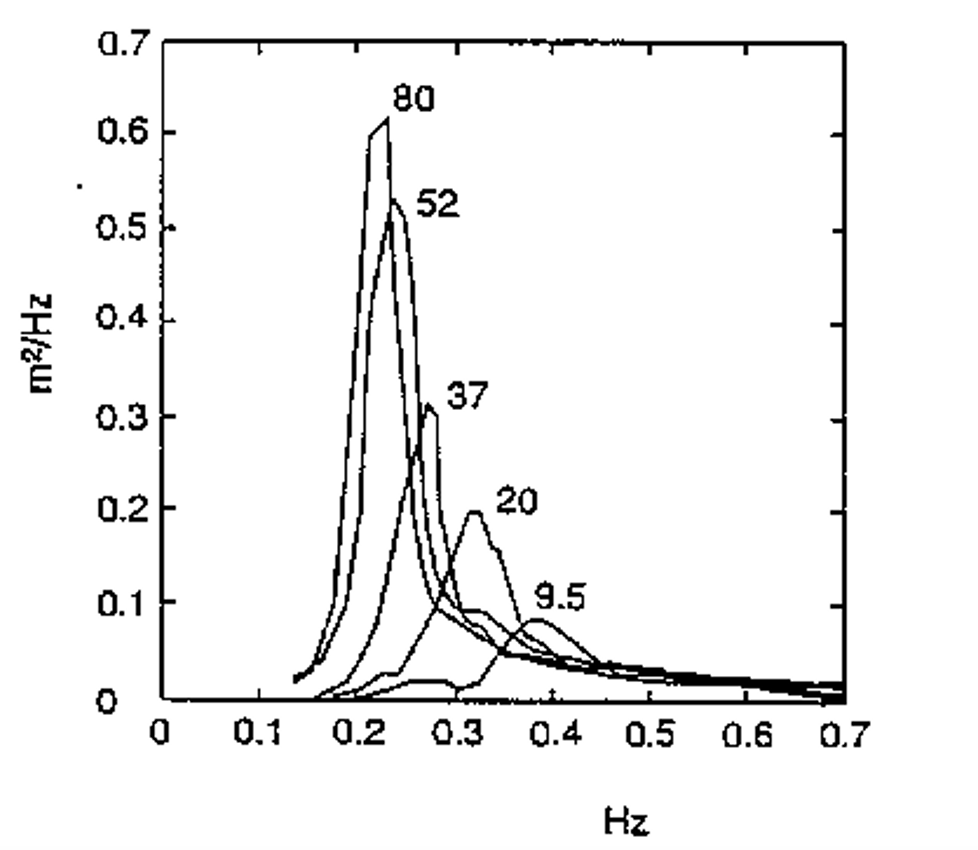

In [39]:
Image('Picture5.png', width = 500)

* a)	Defina y explique el espectro de densidad de varianza (1D) y discuta los problemas encontrados cuando se calcula a partir de datos de campo (es decir, a partir de un registro de onda único de duración D muestreado a la frecuencia Fs). Explique cómo se manejan estos problemas en la práctica.
* b)	¿Cuál sería una frecuencia de muestreo adecuada Fs y una duración D de los registros de onda para obtener estimaciones confiables de los espectros de densidad de varianza que se muestran en la Figura? Justifica cuidadosamente tu respuesta. (Indicación: La resolución espectral debe ser lo suficientemente alta como para tener siempre al menos 10 estimaciones espectrales por debajo de la frecuencia máxima).


* a) El espectro de densidad de varianza (1D) representa la distribución de la varianza de la elevación de la superficie sobre las frecuencias. Como la energía de las olas es proporcional a la varianza, el espectro también muestra la distribución de la energía de las olas en las frecuencias.

Hay 4 problemas prácticos con este enfoque:

Problemas:
* **Duración finita**: solo tenemos un registro de duración finita, y como $\Delta f = 1/D$, esto significa que tenemos una resolución espectral finita. Por lo tanto, no podemos tomar el límite $\Delta f \longrightarrow 0$. Queremos que la duración sea lo más larga posible para resolver los detalles más finos en el espectro, pero lo suficientemente corta para que las ondas aún puedan considerarse estacionarias.

* **Único Registro**: con nuestro registro, obtenemos una única realización de la amplitud, que es una estimación muy pobre del valor esperado (error del orden del 100%). Para obtener una mejor estimación, podemos subdividir el registro de tiempo en $N$ registros de tiempo separados, calcular el espectro para cada registro individual y luego estimar el espectro final como la media de todos los $N$ espectros. Esto reduce el error en un factor de $1/\sqrt{N}$. La desventaja es que la resolución espectral se vuelve más gruesa (empeora), por lo que existe un trade-off entre resolución y precisión.

* **Registro Discreto**: en la práctica, el registro de tiempo se muestrea en algún intervalo de tiempo discreto $\Delta t$, lo que significa que la frecuencia máxima que podemos distinguir es la frecuencia de Nyquist $f_{nyquist} = 1 /(2\Delta t)$. Las frecuencias por encima de la frecuencia de Nyquist se distinguen como frecuencias más bajas (la energía de las ondas por encima de la frecuencia de Nyquist se incluye erróneamente en las energías por debajo de la frecuencia de Nyquist), esto se conoce como Aliasing. Para evitar que esto distorsione demasiado el espectro medido, debemos asegurarnos de que el intervalo de muestreo sea lo suficientemente alto, mucho mayor que las frecuencias de interés (por ejemplo, 10 veces la frecuencia peak).

* **Errores de medición**.

* b) La duración ($D$) está determinada por la resolución de frecuencia requerida y la confiabilidad. Si se necesita una resolución de 1/10 de la frecuencia peak para resolver la parte de baja frecuencia del espectro, entonces un segmento del registro de tiempo debe tener $10/f_{peak}$ de longitud. Si un error del 15\%, digamos, es aceptable, entonces se necesita un cuasi-conjunto de $p = 50$ de tales segmentos (error de muestreo de la densidad espectral $\approx 100\%/\sqrt{p}$). Esto da una duración de registro total de
$50\times D$. La frecuencia de muestreo está determinada por La frecuencia de Nyquist $f_{nyquist} = F_{s} /2$.

---
[Capítulo 6 (L.H. Holthuijsen.)]:

Considere un lago de aguas profundas como en la siguiente figura (tenga en cuenta las dimensiones geográficas). El viento (35 m/s) es constante en el espacio y el tiempo y lleva muchos días soplando. Describa la técnica relativamente simple que está disponible para estimar la altura de ola significativa en la ubicación indicada. Explique todas las variables que se utilizan.


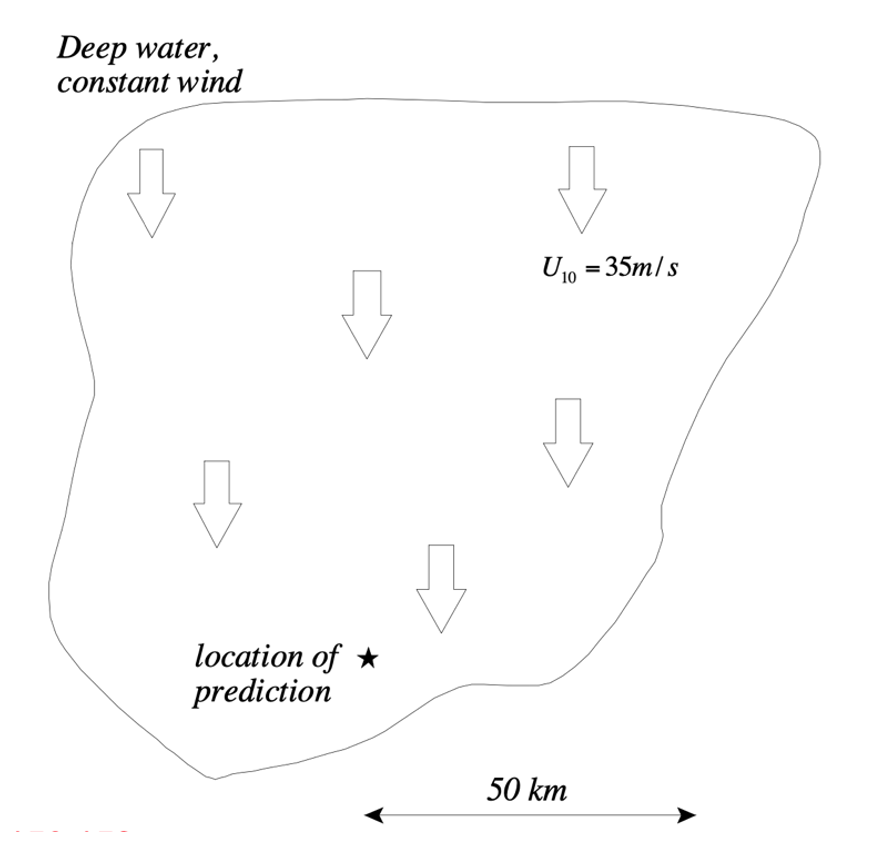

In [38]:
Image('Picture6.png', width = 500)

Bajo ciertas condiciones idealizadas (viento constante que sopla perpendicularmente desde una línea costera larga y recta sobre aguas profundas), la altura significativa de las olas está determinada por el viento, la distancia a la línea costera contra el viento (Fetch) y el tiempo desde que el viento comenzó a soplar (duración ).

Por lo general, se considera que la duración es infinitamente larga (en aplicaciones prácticas, lo suficientemente larga como para que la duración exacta sea irrelevante), de modo que la velocidad del viento y su Fetch son los únicos factores determinantes.

Se determina el Fetch adimensional como:

$$\tilde{F} = \frac{gF}{U_{10}^{2}}$$

Donde:
* $F$: Distancia sobre la cual sopla el viento.
* $U_{10}$: Viento horizontal a 10 metros de elevación.
* $g$: Aceleración de gravedad.

En Fetches Cortos, las olas crecen con bastante rapidez (youn sea states), pero gradualmente el crecimiento se ralentiza hasta que finalmente se detiene (la velocidad de las olas más largas se acerca a la velocidad del viento y la ruptura de las olas equilibra la transferencia de energía del viento a las olas). En estas condiciones típicas de Fetch-limitado (en lagos y embalses), se utilizan comúnmente una ley de potencia simple para determinar la altura significativa:

$$\tilde{H} = a_{1}\tilde{F}^{b1}$$

Observaciones empíricas muestran valores de $a_{1} = 2.88\times 10^{-3}$ y $b_{1} = 0.45$ (Kahma & Calkoen, 1992).

Con esto se puede reemplazar en las relaciones universales para la altura de ola significativa adimensional:

$$\tilde{H}_{1/3} = \frac{g H_{1/3}}{U_{10}^{2}}$$